In [1]:
import matplotlib.pyplot as plt_rain
import plotly.express as py
import plotly.offline
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
df_rain = pd.read_csv("rainfall-1901-2015.csv")
df_rain.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


Text(0.5, 1.0, 'Annual Rainfall received')

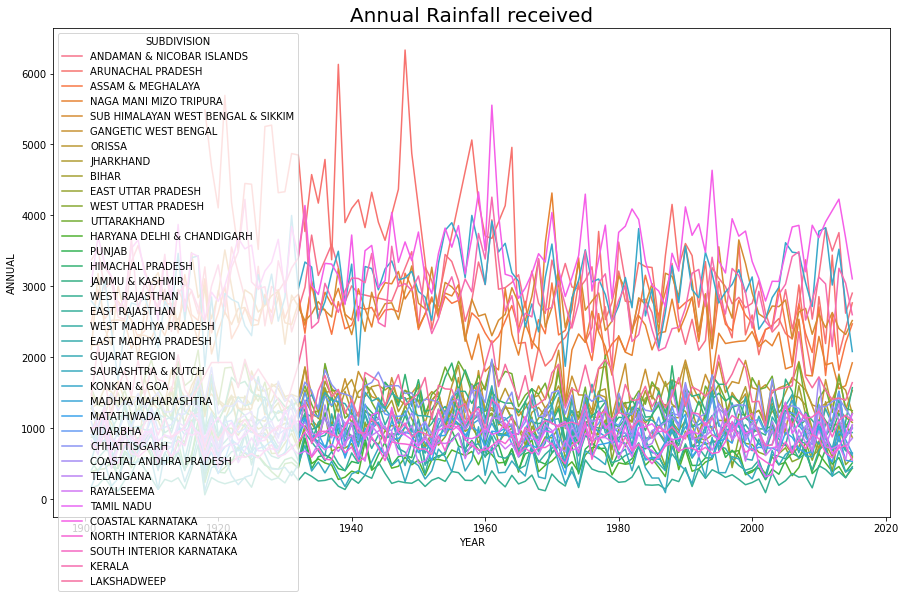

In [3]:
plt_rain.figure(figsize=(15,9))
sns.lineplot( data = df_rain, x = 'YEAR', y= 'ANNUAL', hue = 'SUBDIVISION')
plt_rain.title('Annual Rainfall received',fontsize=20)

Text(0.5, 1.0, 'Highest Rainfall year of States')

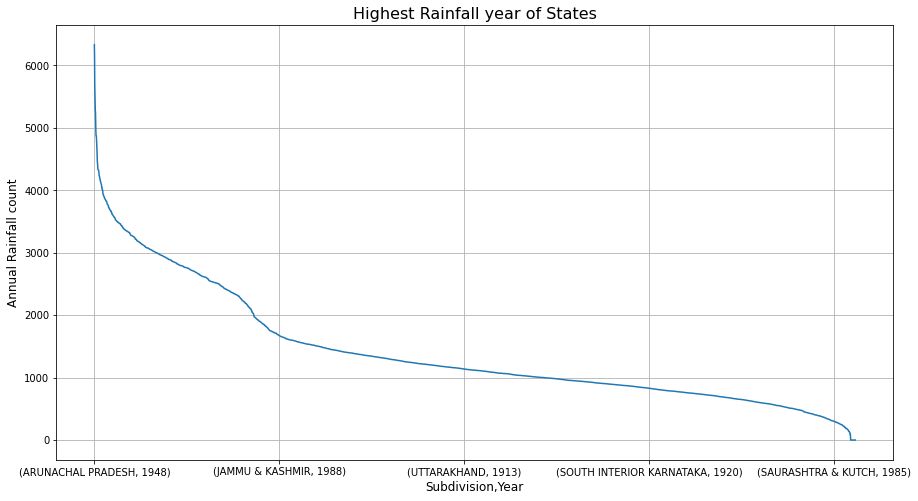

In [4]:
plt_rain.figure(figsize=(15,8))
df_rain.groupby(['SUBDIVISION','YEAR'])['ANNUAL'].sum().sort_values(ascending=False).plot()

plt_rain.grid()
plt_rain.xlabel("Subdivision,Year",fontsize=12)
plt_rain.ylabel("Annual Rainfall count",fontsize=12)
plt_rain.title('Highest Rainfall year of States',fontsize=16)

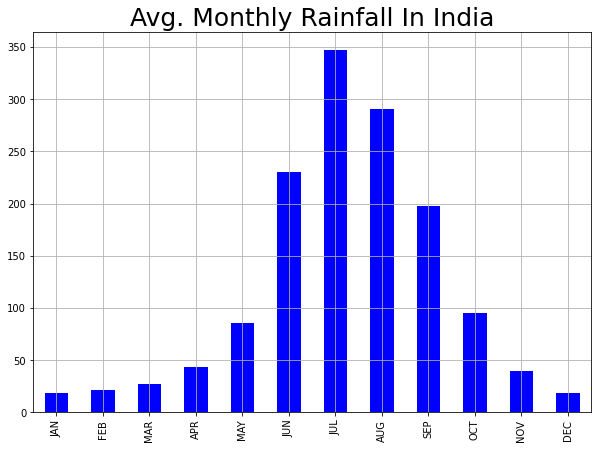

In [6]:
plt_rain.figure(figsize=(10,7))
df_rain[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG','SEP', 'OCT', 'NOV', 'DEC']].mean().plot(kind= 'bar', color='blue')
plt_rain.title('Avg. Monthly Rainfall In India',fontsize=25)
plt_rain.grid()
plt_rain.show()

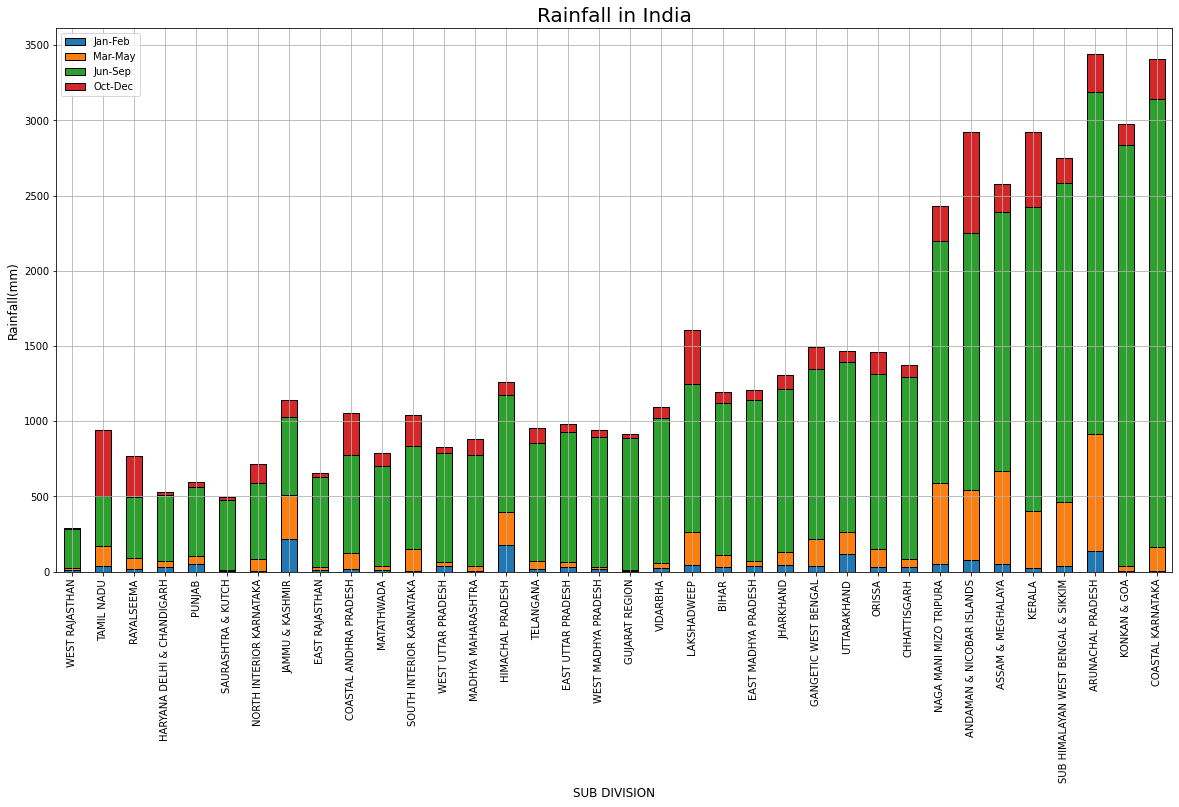

In [7]:
df_rain[['SUBDIVISION', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").mean().sort_values('Jun-Sep').plot.bar(width=0.5,edgecolor='k',align='center',stacked=True,figsize=(20,10))
plt_rain.title('Rainfall in India',fontsize=20)
plt_rain.ylabel('Rainfall(mm)',fontsize=12)
plt_rain.xlabel('SUB DIVISION',fontsize=12)
plt_rain.grid()

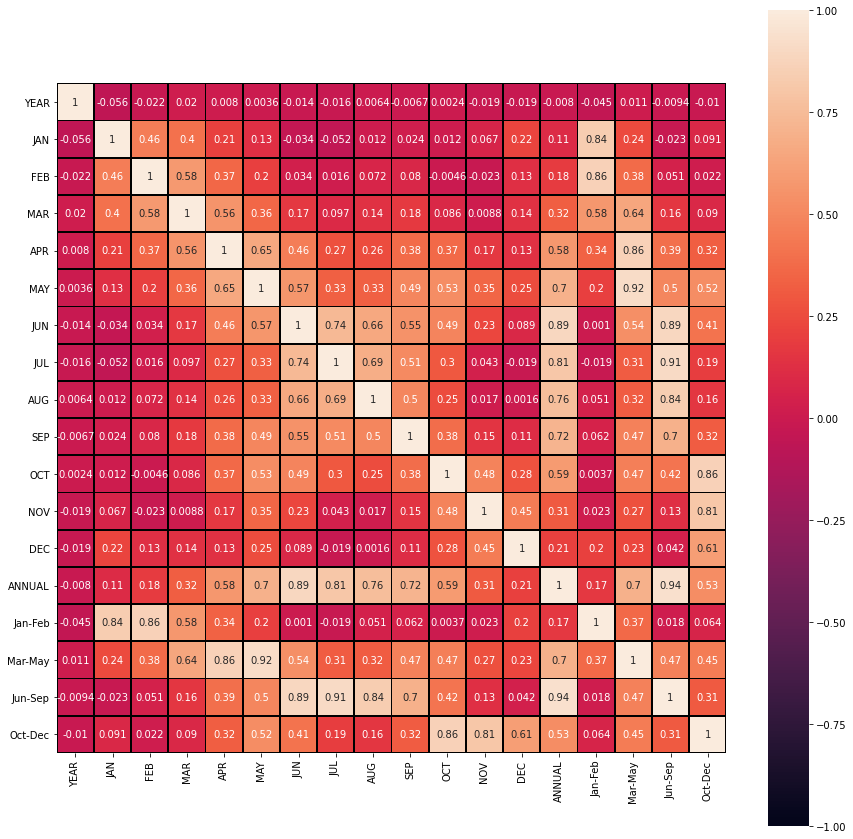

In [8]:
figure=plt_rain.gcf()
figure.set_size_inches(15,15)
figure=sns.heatmap(df_rain.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

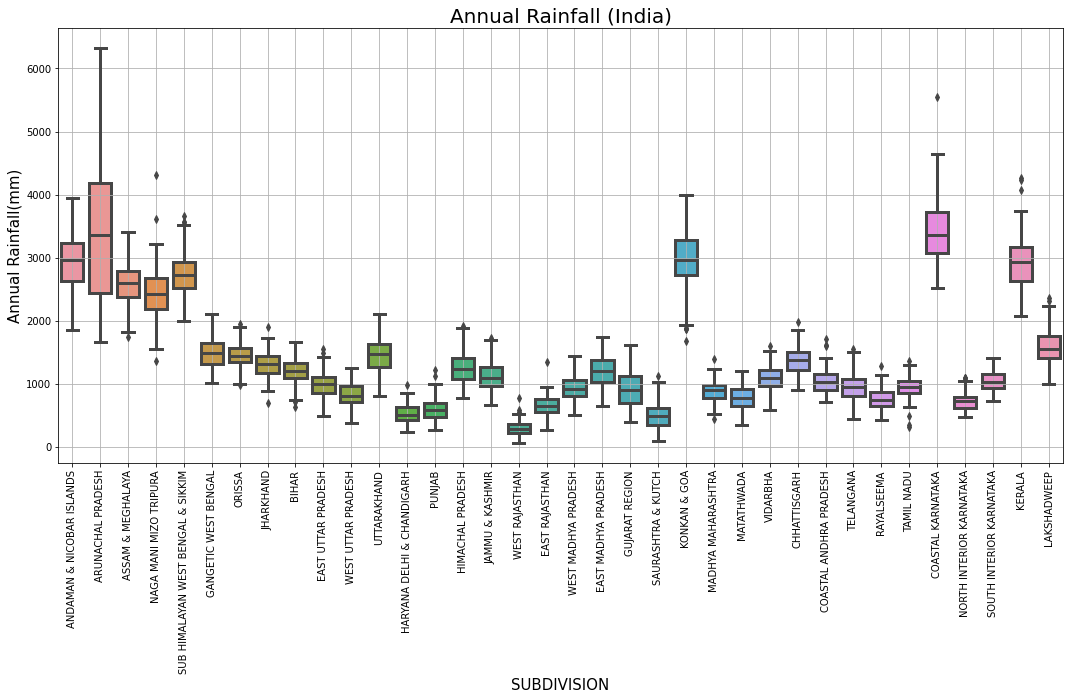

In [12]:
plt_rain.rcParams['figure.figsize']=(18,8)
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=df_rain, width=0.8,linewidth=3)
ax.set_xlabel('SUBDIVISION',fontsize=15)
ax.set_ylabel('Annual Rainfall(mm)',fontsize=15)
plt_rain.title('Annual Rainfall (India)',fontsize=20)
ax.tick_params(axis='x',labelsize=10,rotation=90)
ax.tick_params(axis='y',labelsize=10,rotation=0)
plt_rain.grid()

In [13]:
yr = df_rain.groupby(['YEAR']).sum()
yr['rise_fall'] = np.where(yr['ANNUAL'] > yr['ANNUAL'].shift(1), "Rise", "Fall")
yr['YEAR']= yr.index
yr.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,rise_fall,YEAR
YEAR,,,,,,,,,,,,,,,,,,,
1901,1232.7,1417.8,738.4,1623.6,2465.2,6811.3,10192.3,10546.4,4695.4,2579.4,2266.5,378.3,44947.5,2650.3,4827.2,32245.7,5224.2,Fall,1901
1902,298.2,290.7,733.3,1602.0,2521.4,5908.7,12290.1,8393.0,9051.4,3035.0,1521.0,1160.3,46805.6,588.5,4857.2,35643.5,5716.7,Rise,1902
1903,589.8,502.0,930.2,594.1,2808.3,6019.6,12673.8,10481.9,7581.7,4387.1,1649.8,758.6,47596.9,1091.9,4331.9,36756.8,6716.2,Rise,1903
1904,409.4,328.7,1010.8,1449.1,3235.9,8312.0,10919.0,7595.5,5859.1,2959.3,691.5,517.0,43287.0,737.7,5695.7,32685.6,4168.0,Fall,1904
1905,812.0,716.7,1432.9,1216.4,2675.3,5768.2,10091.0,8637.3,6274.1,2735.9,560.9,595.2,41516.2,1528.6,5324.5,30771.0,3892.2,Fall,1905


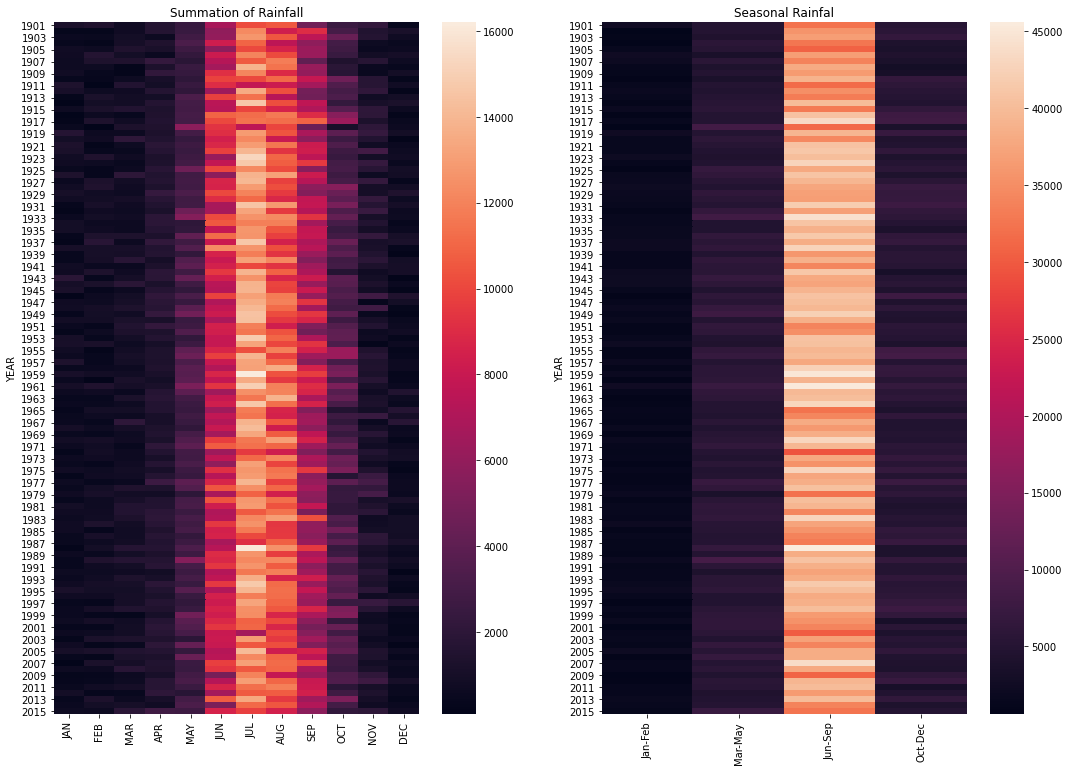

In [14]:
fig = plt_rain.figure(figsize=(18, 28))

x1 = plt_rain.subplot2grid((2, 2), (0, 0))
x1 = plt_rain.xticks(rotation=90)
x1 = sns.heatmap(yr[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
x1 = plt_rain.title('Summation of Rainfall')

x2 = plt_rain.subplot2grid((2, 2), (0, 1))
x2 = plt_rain.xticks(rotation=90)
x2 = sns.heatmap(yr[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
x2 = plt_rain.title('Seasonal Rainfal')

In [15]:
r = df_rain[df_rain.YEAR >= 2009]

In [16]:
r.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
103,ANDAMAN & NICOBAR ISLANDS,2009,24.5,6.3,44.2,136.5,313.1,633.5,297.3,351.5,344.7,272.8,66.2,48.0,2538.6,30.8,493.7,1627.1,386.9
104,ANDAMAN & NICOBAR ISLANDS,2010,101.7,8.0,0.7,12.5,319.0,448.9,521.9,563.8,263.3,402.4,268.5,246.4,3157.1,109.8,332.2,1797.8,917.3
105,ANDAMAN & NICOBAR ISLANDS,2011,265.9,84.8,272.8,111.4,326.5,383.2,583.2,441.5,757.1,212.3,150.8,238.5,3828.0,350.7,710.7,2165.0,601.6
106,ANDAMAN & NICOBAR ISLANDS,2012,119.9,45.6,30.9,55.8,533.9,458.2,317.3,369.6,868.9,209.7,300.5,187.3,3497.6,165.6,620.5,2014.0,697.5
107,ANDAMAN & NICOBAR ISLANDS,2013,67.1,37.6,43.0,46.3,509.3,777.0,564.8,336.7,473.6,455.8,354.2,92.3,3757.8,104.7,598.6,2152.1,902.4
108,ANDAMAN & NICOBAR ISLANDS,2014,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,2622.4,50.5,249.1,1618.7,704.2
109,ANDAMAN & NICOBAR ISLANDS,2015,126.8,7.6,3.1,138.2,331.9,346.4,328.9,480.0,523.3,252.1,236.3,129.9,2904.6,134.4,473.2,1678.6,618.4
200,ARUNACHAL PRADESH,2009,18.0,92.8,72.1,132.7,189.9,259.1,329.9,370.3,152.5,82.9,33.9,15.9,1749.9,110.8,394.7,1111.8,132.7
201,ARUNACHAL PRADESH,2010,0.6,13.2,237.8,466.9,312.7,509.9,378.0,321.5,444.2,97.7,58.9,14.2,2855.7,13.9,1017.5,1653.6,170.9
202,ARUNACHAL PRADESH,2011,40.0,51.3,174.5,240.8,219.6,288.4,531.4,277.6,286.7,51.9,16.2,15.2,2193.7,91.4,634.9,1384.2,83.3
